## BE485/585 Lab 9 - Ex 3
 In this exercise: <br>
 a) read a BSQ Landasat file  
 b) apply different filtering kernels


In [1]:
# import libraries

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
import viplab_lib4 as vip
%matplotlib inline


## 2.  Function to handle the convolution/filtering

In [2]:
#user defined function to apply a filtering kernel to a band 
# the kernel has to be 3x3
def band_filtering(data,fkernel,flag=False,min=0,max=10000):
    #get size of input band
    nrows,ncols=data.shape
    
    #create empty band
    datares=np.zeros((nrows-3,ncols-3))
    for i in range(0,nrows-3):
        for j in range(0,ncols-3):
            value=0
            #loop a 3x3 kernel 
            Weight =0.0
            for r in range(0,3):
                for c in range(0,3):
                    #row and column at original image
                    row=i+r
                    col=j+c
                    
                    valuekernel=fkernel[r,c]
                    if (flag):
                        if (data[row,col]>min and data[row,col]<max):
                            value=value+(data[row,col]*valuekernel)
                            Weight += valuekernel
                    else:
                        value=value+(data[row,col]*valuekernel)
                        Weight += valuekernel
            if (flag):
                datares[i,j]=value/Weight
            else:
                datares[i,j]=value
    return datares

## 3. Read image/data and display subset 
### Create a fake striped image so we can correct later

Reading BSQ  ./Data/LANDSAT08.A2018261.YUMA.bsq


(-0.5, 500.5, 499.5, -0.5)

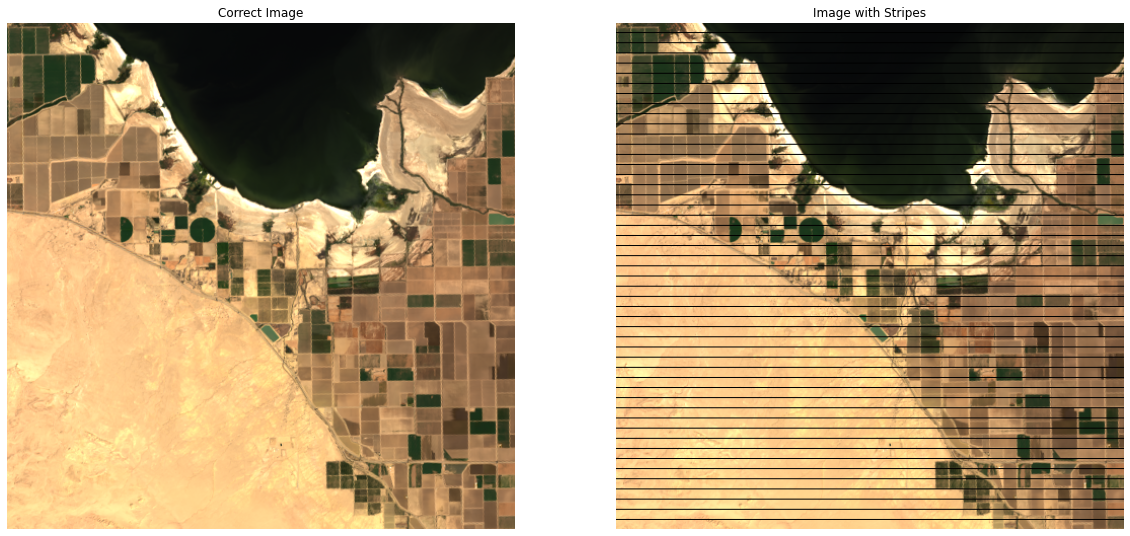

In [3]:
# Starts main program
        
#Load NEON Dataset    
filename="./Data/LANDSAT08.A2018261.YUMA.bsq"
nrows=2340
ncols=2848
SkipRows= 10
nbands=6
datatype=np.int16
# bands Name and order
# 0: B2 (Blue)
# 1: B3 (Green)
# 2: B4 (Red)
# 3: B5 (NIR)
# 4: B6 (SWIR1)
# 5: B7 (MIR)


# Read all bands into a single DataCube
print("Reading BSQ ",filename)

dataRed=vip.BSQ_band_read(filename,2,nrows,ncols)  
dataGreen=vip.BSQ_band_read(filename,1,nrows,ncols)  
dataBlue=vip.BSQ_band_read(filename,0,nrows,ncols)  
dataNIR=vip.BSQ_band_read(filename,3,nrows,ncols)  

#Cretae copies of the data 
dataRedStripes=np.copy(dataRed[0:500,700:1201])
dataGreenStripes=np.copy(dataGreen[0:500,700:1201])
dataBlueStripes=np.copy(dataBlue[0:500,700:1201])
#Destroy every 10th line to simulate stripes 
for iRow in range(0,dataRedStripes.shape[0],SkipRows):
    dataRedStripes[iRow,:]=0
    dataGreenStripes[iRow,:]=0
    dataBlueStripes[iRow,:]=0

#Read an RGB image 
RGB_img=vip.Image_getRGB(dataRed[0:500,700:1201],dataGreen[0:500,700:1201],dataBlue[0:500,700:1201],10000,3500)
RGB_Striped_Img=vip.Image_getRGB(dataRedStripes,dataGreenStripes,dataBlueStripes,10000,3500)
    
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].imshow(RGB_img)
ax[0].set_title("Correct Image")
ax[0].axis('off')

ax[1].imshow(RGB_Striped_Img)
ax[1].set_title("Image with Stripes")
ax[1].axis('off')

#### <font color=red>To Do</font>
 Create a filter to remove the stripes and show the before and after images
 Think about what happened to the image (Stripes, where?)  and how to fix them?
 No work with the drone image that has horizontal stripes and try to correct them
<img src="./Ancillary/DroneStripesImage.jpg"></img>

In [4]:
####Your code here!

#### <font color=red>Here is an example of how to correct </font>
You could implement an algorithm using the ROW above and BELOW to create an average for the missing row (stripes). Remember you need to skip the stripe

Reading BSQ  ./Data/DRONE_IMAGE.bsq


(-0.5, 749.5, 799.5, -0.5)

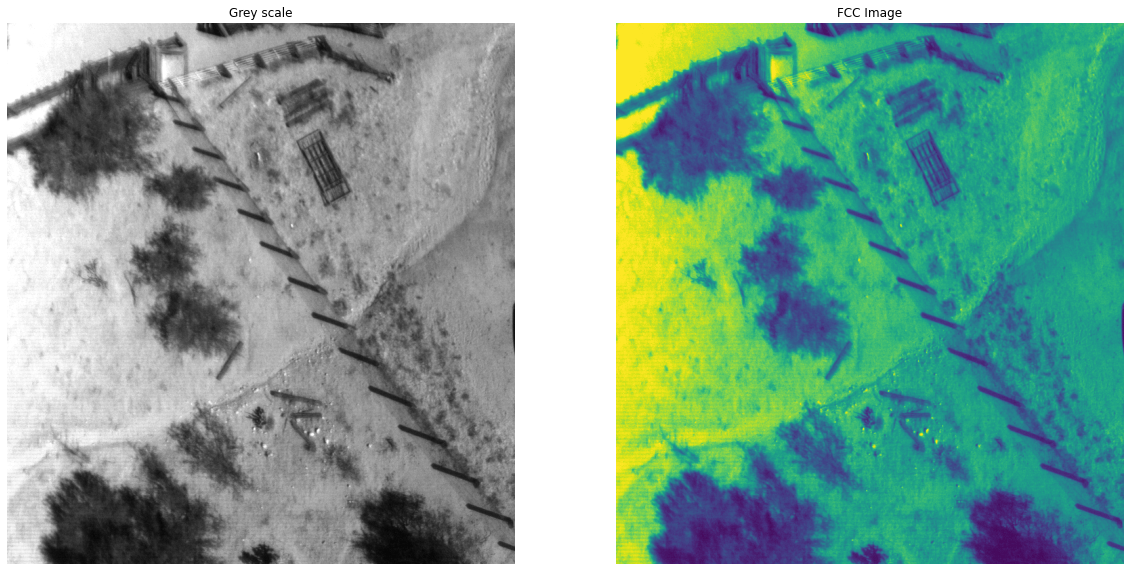

In [5]:
filename="./Data/DRONE_IMAGE.bsq"
nrows=800
ncols=750
nbands=1
datatype=np.int16
# Read all bands into a single DataCube
print("Reading BSQ ",filename)

dataNIR=vip.BSQ_band_read(filename,0,nrows,ncols)  

fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].imshow(dataNIR,cmap="gray")
ax[0].set_title("Grey scale")
ax[0].axis('off')

ax[1].imshow(dataNIR)
ax[1].set_title("FCC Image")
ax[1].axis('off')